In [17]:
import pandas as pd
import numpy as np
float_formatter = lambda x: "%.3f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
from sklearn.datasets.samples_generator import make_circles
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.metrics import pairwise_distances
from matplotlib import pyplot as plt
import networkx as nx
import seaborn as sns
sns.set()

In [18]:
GloVe_df = pd.read_csv("GloVe.csv")
GloVe_df

,user_id,hate,0_glove,1_glove,2_glove,3_glove,4_glove,5_glove,6_glove,7_glove,...,290_glove,291_glove,292_glove,293_glove,294_glove,295_glove,296_glove,297_glove,298_glove,299_glove
0,0,normal,-0.071806,0.106978,-0.176602,-0.055014,0.080056,-0.039964,0.024863,-0.087665,...,-0.162803,0.022277,-0.061740,-0.108736,0.095297,0.014048,-0.079171,-0.064034,0.039573,0.121562
1,6,other,-0.065580,0.147344,-0.152149,-0.026615,0.047478,-0.050444,-0.017763,-0.069236,...,-0.186505,0.065958,-0.036553,-0.091797,0.094917,-0.036796,-0.088716,-0.062558,0.062685,0.118133
2,7,other,-0.028489,0.138307,-0.121603,-0.039703,0.079320,-0.033732,0.003317,-0.079703,...,-0.183145,0.050471,-0.003738,-0.069890,0.086256,-0.024214,-0.064788,-0.057131,0.040548,0.118302
3,12,other,-0.038831,0.129995,-0.031333,0.010532,0.086184,-0.060529,0.036354,-0.129217,...,-0.029896,-0.020088,-0.084585,-0.113064,0.100583,-0.053707,-0.030563,-0.014074,-0.035487,0.098736
4,14,other,-0.088331,0.128460,-0.069922,0.011715,0.047237,-0.045111,0.010369,-0.077945,...,-0.118261,0.038635,-0.025639,-0.071514,0.093105,-0.048317,-0.024028,-0.038796,-0.000818,0.095012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34492,100380,hateful,-0.076519,0.119216,-0.090964,0.009253,0.070197,-0.071825,0.000311,-0.047510,...,-0.160235,0.050770,-0.049493,-0.098586,0.087736,0.012583,-0.034733,-0.044058,-0.012266,0.103631
34493,100381,other,-0.058525,0.135925,-0.037535,0.046996,0.093766,-0.096308,-0.000296,-0.032090,...,-0.101585,0.056177,-0.011879,-0.079700,0.057477,-0.037915,-0.044164,-0.029799,-0.056733,0.108609
34494,100382,other,-0.041728,0.138292,-0.029427,0.002030,0.092320,-0.057140,0.045027,-0.116939,...,-0.048893,-0.034731,-0.102936,-0.107279,0.135280,-0.022714,-0.062393,-0.037941,-0.016274,0.070525
34495,100384,other,-0.036352,0.144033,-0.160847,-0.027072,0.083716,-0.050102,0.023898,-0.136060,...,-0.140663,0.020672,-0.031872,-0.104729,0.103883,-0.035841,-0.071515,-0.048701,0.055673,0.084698


In [36]:
GloVe_df = GloVe_df.query("hate != 'other'")
GloVe = GloVe_df[GloVe_df.columns[2:]].to_numpy()
GloVe

array([[-0.072, 0.107, -0.177, ..., -0.064, 0.040, 0.122],
       [-0.039, 0.113, -0.196, ..., -0.044, 0.062, 0.119],
       [-0.000, 0.156, -0.145, ..., -0.052, 0.064, 0.077],
       ...,
       [-0.019, 0.122, -0.142, ..., -0.057, 0.001, 0.102],
       [-0.077, 0.119, -0.091, ..., -0.044, -0.012, 0.104],
       [-0.048, 0.119, 0.046, ..., -0.016, -0.049, 0.074]])

In [37]:
%%time
W = pairwise_distances(GloVe, metric="euclidean")
W

Wall time: 10.9 s


array([[0.000, 0.724, 0.488, ..., 0.585, 0.600, 1.871],
       [0.724, 0.000, 0.817, ..., 0.980, 1.026, 1.866],
       [0.488, 0.817, 0.000, ..., 0.531, 0.626, 1.737],
       ...,
       [0.585, 0.980, 0.531, ..., 0.000, 0.631, 1.718],
       [0.600, 1.026, 0.626, ..., 0.631, 0.000, 1.639],
       [1.871, 1.866, 1.737, ..., 1.718, 1.639, 0.000]])

In [38]:
W.shape

(4756, 4756)

In [39]:
#np.save('Distance_Matrix', W, allow_pickle=True, fix_imports=True)
sum_ = np.sum(W,axis=1).tolist()
summ = 0
for i in sum_:
    summ = i + summ
print(summ/(4756**2))

0.839758502635911


In [40]:
vectorizer = np.vectorize(lambda x: 1 if (x < 0.8 and x > 0) else 0)
W = np.vectorize(vectorizer)(W)
W

array([[0, 1, 1, ..., 1, 1, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 1, 0],
       ...,
       [1, 0, 1, ..., 0, 1, 0],
       [1, 0, 1, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [41]:
def draw_graph(G):
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_labels(G, pos)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

[[0 1 1 ... 0 0 1]
 [1 0 1 ... 0 1 0]
 [1 1 0 ... 1 0 0]
 ...
 [0 0 1 ... 0 1 0]
 [0 1 0 ... 1 0 0]
 [1 0 0 ... 0 0 0]]


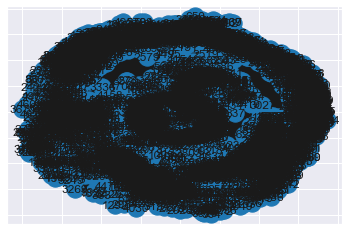

In [42]:
G = nx.random_graphs.erdos_renyi_graph(4756, 0.5)
draw_graph(G)
W = nx.adjacency_matrix(G)
print(W.todense())

In [43]:
# degree matrix
D = np.diag(np.sum(np.array(W.todense()), axis=1))
print('degree matrix:')
print(D)
# laplacian matrix
L = D - W
print('laplacian matrix:')
print(L)

degree matrix:
[[2324    0    0 ...    0    0    0]
 [   0 2431    0 ...    0    0    0]
 [   0    0 2361 ...    0    0    0]
 ...
 [   0    0    0 ... 2398    0    0]
 [   0    0    0 ...    0 2430    0]
 [   0    0    0 ...    0    0 2381]]
laplacian matrix:
[[2324   -1   -1 ...    0    0   -1]
 [  -1 2431   -1 ...    0   -1    0]
 [  -1   -1 2361 ...   -1    0    0]
 ...
 [   0    0   -1 ... 2398   -1    0]
 [   0   -1    0 ...   -1 2430    0]
 [  -1    0    0 ...    0    0 2381]]


In [44]:
e, v = np.linalg.eig(L)
# eigenvalues
print('eigenvalues:')
print(e)
# eigenvectors
print('eigenvectors:')
print(v)

eigenvalues:
[0.000 2516.684 2515.817 ... 2375.603 2374.540 2372.571]
eigenvectors:
[[-0.015 0.004 -0.003 ... 0.002 -0.000 0.000]
 [-0.015 0.006 0.007 ... 0.011 -0.001 0.008]
 [-0.015 -0.001 0.002 ... -0.030 -0.019 -0.005]
 ...
 [-0.015 0.004 -0.003 ... -0.000 0.025 -0.002]
 [-0.015 0.005 -0.003 ... 0.004 0.011 0.010]
 [-0.015 0.001 0.005 ... -0.038 -0.017 0.005]]


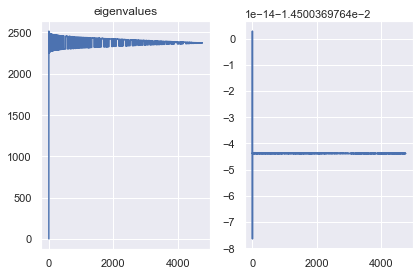

In [45]:
fig = plt.figure()
ax1 = plt.subplot(121)
plt.plot(e)
ax1.title.set_text('eigenvalues')
i = np.where(e < 10e-6)[0]
ax2 = plt.subplot(122)
plt.plot(v[:, i[0]])
fig.tight_layout()
plt.show()

In [48]:
val = e[-2]
vect = v[:,-2]
c = vect.tolist()
c

[[-6.485410347935152e-05],
 [-0.0009218300996921683],
 [-0.018747642540998363],
 [0.002733547733843521],
 [0.010859345586945028],
 [-0.02811378018762996],
 [0.011664804396441504],
 [-0.003919216833995889],
 [-0.019128303943751906],
 [0.003964774191452443],
 [0.008240757775172641],
 [-0.01764978916643766],
 [0.01555826630550854],
 [-0.0025026212572648704],
 [-0.001530940608177464],
 [-0.007570033538851746],
 [0.012381847541253634],
 [0.003453583468676923],
 [0.0056062778888314865],
 [0.0009339786016114409],
 [0.007667369280284544],
 [-0.007623932009209993],
 [0.004856872198666449],
 [-0.008406031538703503],
 [-0.03849707864199899],
 [0.01818596922320366],
 [0.00730554526004999],
 [0.004919043376009336],
 [-0.00811231337938494],
 [-0.01438555638066029],
 [0.016438390733503935],
 [-0.02275409045492232],
 [-0.0003635878267682432],
 [-0.008344214357226067],
 [0.046500030214825315],
 [-0.00012140138750002654],
 [0.010354019159180581],
 [0.016050174583027748],
 [0.006174925567391737],
 [0.003

In [49]:
cluster =[]
for node in range(W.shape[0]):
    if c[node][0] > 0 :
        cluster.append('1')
    else:
        cluster.append('2')
GloVe_df['spec_cluster']=cluster
GloVe_df.to_csv('spectral_cluster.csv') 

In [54]:
GloVe_df.groupby('hate')['spec_cluster'].value_counts()

hate     spec_cluster
hateful  1                267
         2                267
normal   2               2116
         1               2106
Name: spec_cluster, dtype: int64